<a href="https://colab.research.google.com/github/RohanCheera/DAV_Python/blob/main/Projects/Store_Sales_and_Profit_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np


In [66]:
data=pd.read_csv('/content/Sample - Superstore.csv',encoding='latin-1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [68]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [69]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [132]:
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [71]:
data['Order Month']=data['Order Date'].dt.month
data['Order Year']=data['Order Date'].dt.year
data['Order day of week']=data['Order Date'].dt.dayofweek

Now lets look at the monthly sales

In [72]:
monthly_sales=data.groupby('Order Month')['Sales'].sum().reset_index()

In [73]:
monthnames=['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']

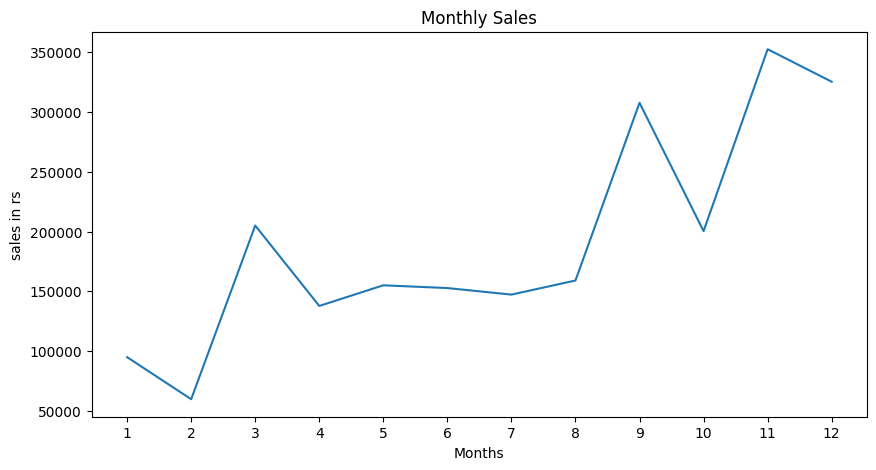

In [82]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Order Month'],monthly_sales['Sales'])
plt.xlabel("Months")
plt.ylabel("sales in rs")
plt.title('Monthly Sales')
plt.xticks([i+1 for i in range(12)])
plt.show()

Now lets do sales by category

In [84]:
salesbycat=data.groupby('Category')['Sales'].sum()

In [83]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order day of week'],
      dtype='object')

In [91]:
salesbycat=salesbycat.reset_index()
salesbycat

,index,Category,Sales
0,0,Furniture,741999.7953
1,1,Office Supplies,719047.0320
2,2,Technology,836154.0330


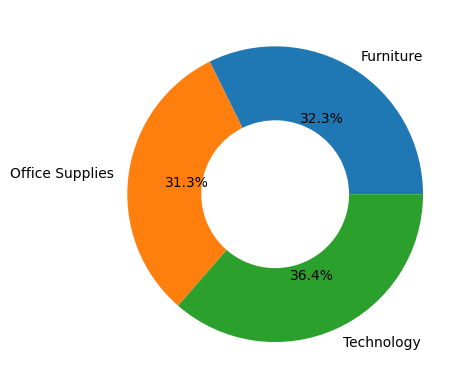

In [110]:
plt.pie(salesbycat['Sales'],labels=salesbycat['Category'],wedgeprops=dict(width=0.5),autopct='%1.1f%%')
plt.show()

Now lets have a look of the sales by sub category

In [127]:
salesbysubcat=data.groupby('Sub-Category')['Sales'].sum().reset_index()
salesbysubcat['Sales']=salesbysubcat['Sales'].astype('int64')
salesbysubcat

,Sub-Category,Sales
0,Accessories,167380
1,Appliances,107532
2,Art,27118
3,Binders,203412
4,Bookcases,114879
5,Chairs,328449
6,Copiers,149528
7,Envelopes,16476
8,Fasteners,3024
9,Furnishings,91705


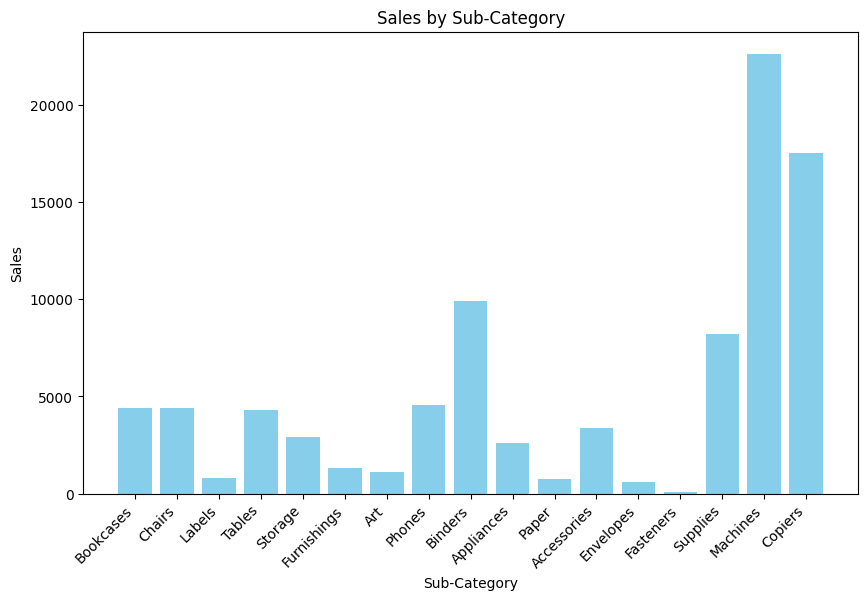

In [129]:
plt.figure(figsize=(10, 6))
plt.bar(data['Sub-Category'], data['Sales'], color='skyblue')

# Add labels and title
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Sales by Sub-Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

Now let’s have a look at the monthly profits:

In [141]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order day of week'],
      dtype='object')

In [142]:
monthly_profits=data.groupby('Order Month')['Profit'].sum().reset_index()
monthly_profits

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


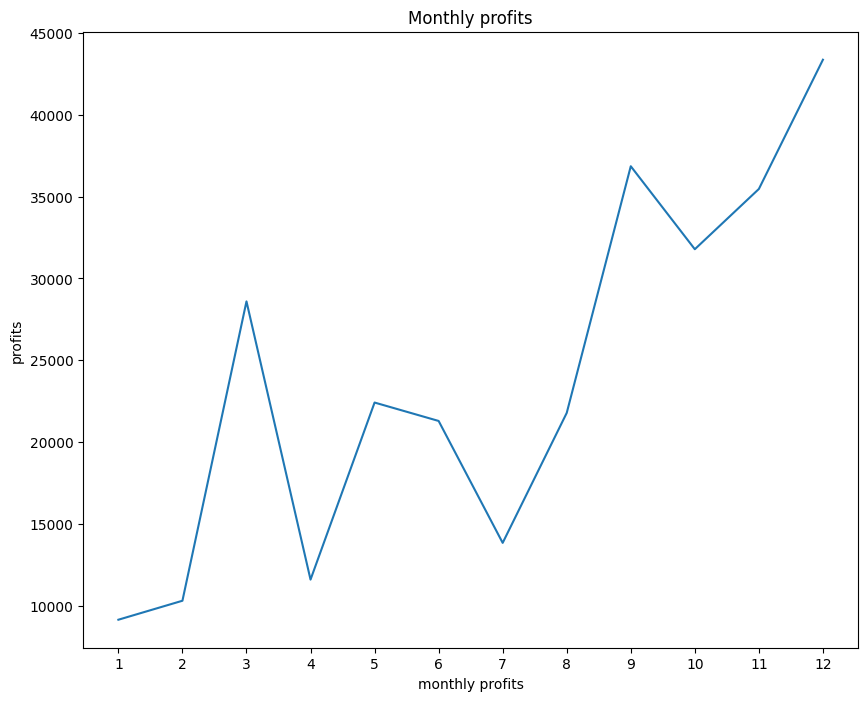

In [147]:
plt.figure(figsize=(10,8))
plt.plot(monthly_profits['Order Month'],monthly_profits['Profit'])
plt.xlabel("monthly profits")
plt.ylabel("profits")
plt.title("Monthly profits")
plt.xticks([i for i in range(1,13)])

plt.show()

Now lets consider the profit by category

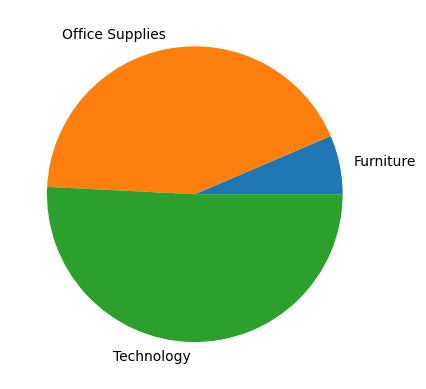

In [152]:
catprofits=data.groupby('Category')['Profit'].sum().reset_index()
plt.pie(catprofits['Profit'],labels=catprofits['Category'])
plt.show()

Now lets consider the profit by sub category

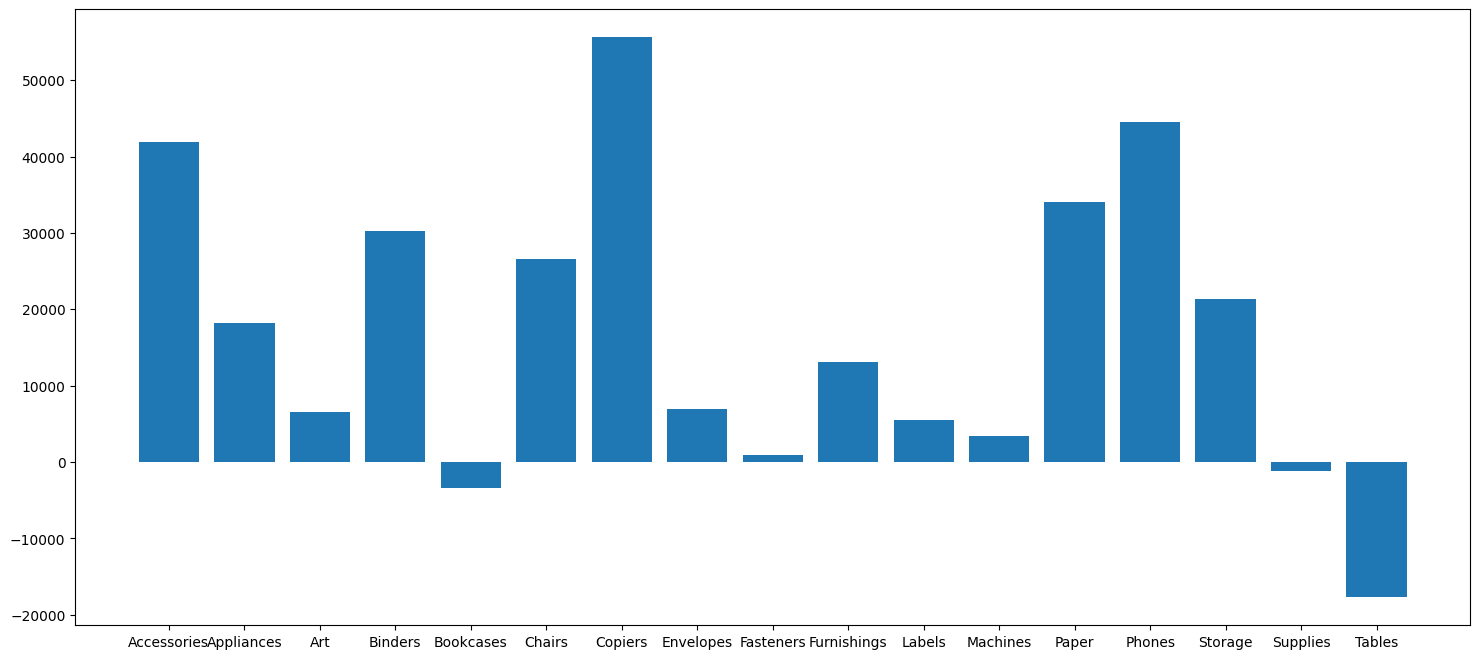

In [162]:
plt.figure(figsize=(18,8))
subcatprofits=data.groupby('Sub-Category')['Profit'].sum().reset_index()
plt.bar(subcatprofits['Sub-Category'],subcatprofits['Profit'])
plt.show()

In [163]:
data.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [166]:
sales_profit_by_segment=data.groupby('Segment').aggregate({'Sales':'sum','Profit':'sum'}).reset_index()

In [170]:
sales_profit_by_segment.Sales=sales_profit_by_segment.Sales.astype('int64')
sales_profit_by_segment.Profit=sales_profit_by_segment.Profit.astype('int64')
sales_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1161401,134119
1,Corporate,706146,91979
2,Home Office,429653,60298


<BarContainer object of 3 artists>

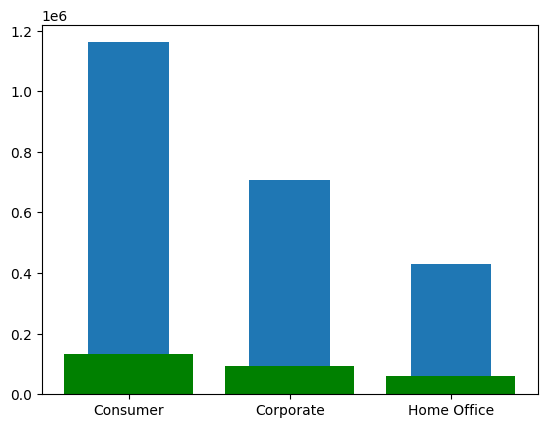

In [178]:
plt.bar(sales_profit_by_segment.Segment,sales_profit_by_segment.Sales,width=0.5)
plt.bar(sales_profit_by_segment.Segment,sales_profit_by_segment.Profit,color='g')
